# Project Team ID : 

# Project Name: Portugese Bank

# Business Use Case: To Predict if the Client will subscribe to the Term Deposit

## Step 1: Importing the necessary Packages

In [1]:
# Data Analysis 
import numpy as np
import pandas as pd

#for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Retreive input Excel File

In [2]:
por=pd.read_csv('D:/Datamites Material/Internship/Datasets/PRCP-1000-PortugeseBank/Data/bank-additional/bank-additional-full.csv',sep=';')

## Step 3: Basic Information Checking

### 3.1 : Displaying first five records

In [3]:
por.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 3.2 : Displaying last five records

In [4]:
por.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### 3.3 : Finding the shape of the dataset

In [5]:
por.shape

(41188, 21)

### 3.4 Finding the column names and its datatype

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 3.5 : Renaming the column names 

In [7]:
por.rename(columns={'default':'default_credit',
                    'contact':'communication_type',
                    'emp.var.rate':'emp_var_rate',
                    'cons.price.idx':'cons_price_idx',
                    'cons.conf.idx':'cons_conf_idx',
                    'nr.employed':'no_of_employees',
                    'poutcome':'previous_outcome',
                     'housing':'house_loan',
                     'loan':'personal_loan',
                     'y':'Term_deposit'},inplace=True)

In [8]:
por.columns

Index(['age', 'job', 'marital', 'education', 'default_credit', 'house_loan',
       'personal_loan', 'communication_type', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'previous_outcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'no_of_employees', 'Term_deposit'],
      dtype='object')

### 3.6 : Finding the Statistical Information

In [9]:
#by default describe method shows the numerical feature information
por.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# finding the statistical information 
por.describe(include="object")

,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,previous_outcome,Term_deposit
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
por.isnull().sum().sum()

0

## Step 4: Exploratory Data Analysis

### 4.1 : Finding the no.of numerical columns

In [12]:
# finding the list of numerical features 
num_features = [feature for feature in por.columns if por[feature].dtypes !='O']
print("No.of numerical features are:",len(num_features))
      
#printing the first five records of numerical features
por[num_features].head()

No.of numerical features are: 10


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Analysing the numerical features 

In [13]:
'''
def plot(col):
    plt.subplot(1,2,1)
    sns.distplot(col)
    plt.subplot(1,2,2)
    sns.boxplot(col)
plot(por.age)'''

'\ndef plot(col):\n    plt.subplot(1,2,1)\n    sns.distplot(col)\n    plt.subplot(1,2,2)\n    sns.boxplot(col)\nplot(por.age)'

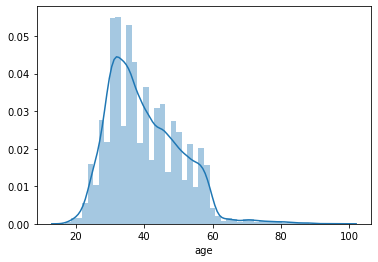

In [14]:
# plotting the distributions for numerical continous feature
sns.distplot(por['age'])

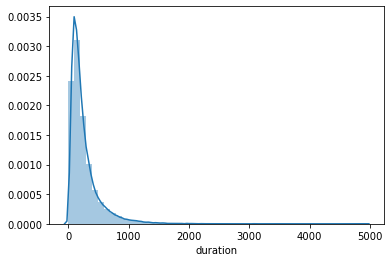

In [15]:
sns.distplot(por.duration)

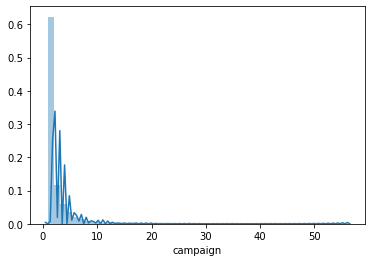

In [16]:
sns.distplot(por.campaign)

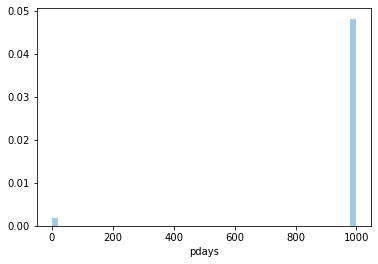

In [17]:
sns.distplot(por.pdays)

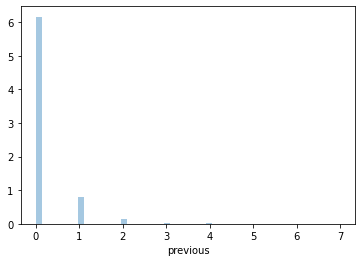

In [18]:
sns.distplot(por.previous)

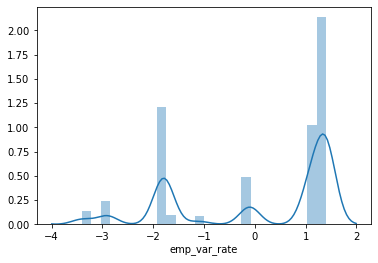

In [19]:
sns.distplot(por.emp_var_rate)

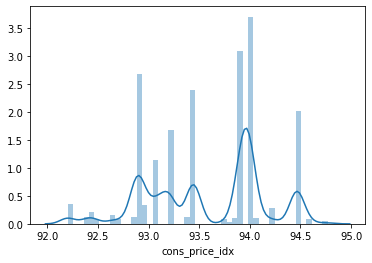

In [20]:
sns.distplot(por.cons_price_idx	)

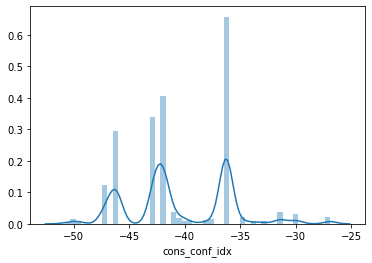

In [21]:
sns.distplot(por.cons_conf_idx)

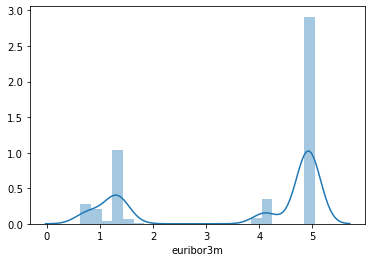

In [22]:
sns.distplot(por.euribor3m)

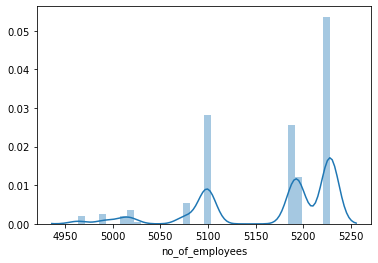

In [23]:
sns.distplot(por.no_of_employees)

In [24]:
Q1=por.age.quantile(.25)
Q3=por.age.quantile(.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("Min Value",por.age.min())
print("Max Value ",por.age.max())
print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print('lower_limit',lower_limit)
print('upper_limit',upper_limit)

Min Value 17
Max Value  98
Q1  32.0
Q3  47.0
IQR  15.0
lower_limit 9.5
upper_limit 69.5


Outliers in age: [70 76 73 88 88 88 88 88 88 88 88 88 88 88 88 88 95 70 70 70 77 75 70 70
 73 80 80 80 72 72 82 73 71 70 70 70 71 70 70 71 75 73 73 71 75 75 78 75
 70 78 75 78 85 85 85 80 71 85 85 79 77 83 81 71 81 73 71 71 88 81 81 81
 71 83 75 78 88 77 72 79 79 74 75 72 72 70 79 74 74 74 74 76 76 82 75 70
 73 73 73 73 76 70 85 80 70 74 74 76 88 74 81 76 74 76 73 72 70 71 70 70
 76 72 73 80 74 71 74 80 74 73 74 71 76 76 87 79 70 74 88 81 80 80 78 71
 71 72 73 73 73 79 72 71 83 76 76 72 71 71 76 75 71 78 78 91 91 76 73 76
 73 71 83 70 70 70 70 70 70 70 81 70 70 78 71 71 75 83 71 82 82 82 80 80
 86 77 75 77 70 80 71 71 71 80 80 71 71 74 74 74 83 85 70 70 70 88 88 71
 98 98 73 72 71 71 81 71 75 81 73 80 75 72 82 82 78 78 72 78 71 79 71 73
 81 81 76 71 71 79 79 72 72 72 72 78 80 77 77 78 75 72 77 72 82 83 83 94
 78 86 78 72 77 73 81 76 83 83 80 73 86 70 71 81 74 85 84 85 70 70 76 76
 76 76 76 73 73 78 72 85 74 73 80 73 82 75 70 75 80 78 78 86 84 76 82 75
 71 71 80 74 82 82 74 74 74 85 85 

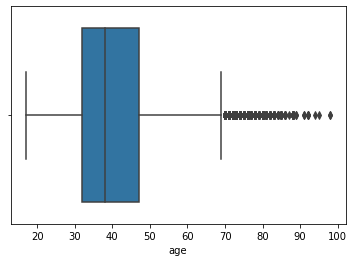

In [25]:
# defined the function for finding the outliers in numerical variables. Returns the array of outliers 
def outliers(col):
    Outliers=[]
    Q1=col.quantile(.25)
    Q3=col.quantile(.75)
    IQR=Q3-Q1
    Lower_bound=Q1-(1.5*IQR)
    Upper_bound=Q3+(1.5*IQR)
    for val in col:
        if val<Lower_bound or val>Upper_bound:
            Outliers.append(val)
    return np.array(Outliers)

print("Outliers in age:",outliers(por.age))
print("Number of Outliers in age:",len(outliers(por.age)))
sns.boxplot(por.age)

Outliers in duration: [1666  787  812 ...  843 1868  651]
Number of Outliers in duration: 2963


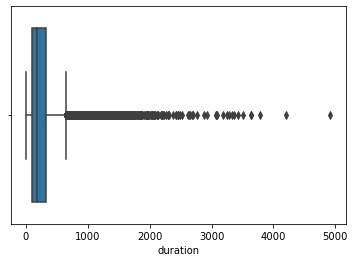

In [26]:
print("Outliers in duration:",outliers(por.duration))
print("Number of Outliers in duration:",len(outliers(por.duration)))
sns.boxplot(por.duration)

Outliers in campaign: [7 8 8 ... 7 9 7]
Number of Outliers in campaign: 2406


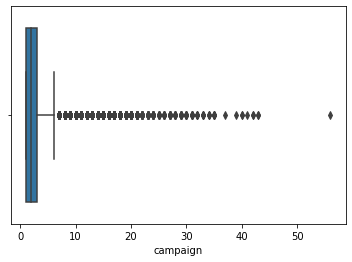

In [27]:
print("Outliers in campaign:",outliers(por.campaign))
print("Number of Outliers in campaign:",len(outliers(por.campaign)))
sns.boxplot(por.campaign)

Outliers in pdays: [6 4 4 ... 1 6 9]
Number of Outliers in pdays: 1515


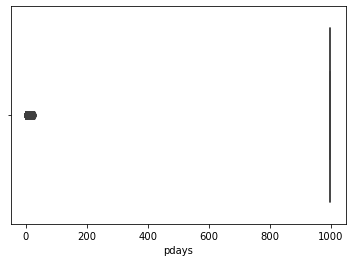

In [28]:
print("Outliers in pdays:",outliers(por.pdays))
print("Number of Outliers in pdays:",len(outliers(por.pdays)))
sns.boxplot(por.pdays)

Outliers in previous: [6 4 4 ... 1 6 9]
Number of Outliers in previous: 5625


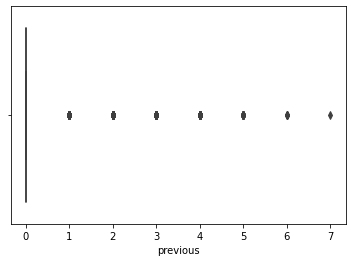

In [29]:
print("Outliers in previous:",outliers(por.pdays))
print("Number of Outliers in previous:",len(outliers(por.previous)))
sns.boxplot(por.previous)

Outliers in emp_var_rate: []
Number of Outliers in emp_var_rate: 0


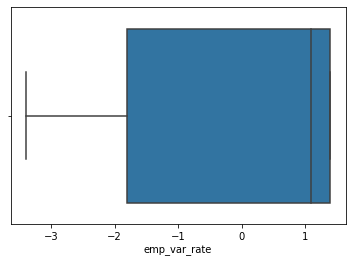

In [30]:
print("Outliers in emp_var_rate:",outliers(por.emp_var_rate))
print("Number of Outliers in emp_var_rate:",len(outliers(por.emp_var_rate)))
sns.boxplot(por.emp_var_rate)

Outliers in no_of_employees: []
Number of Outliers in no_of_employees: 0


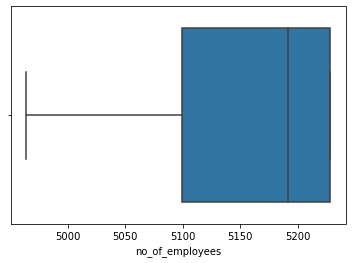

In [31]:
print("Outliers in no_of_employees:",outliers(por.no_of_employees))
print("Number of Outliers in no_of_employees:",len(outliers(por.no_of_employees)))
sns.boxplot(por.no_of_employees)

Outliers in cons_price_idx: []
Number of Outliers in cons_price_idx: 0


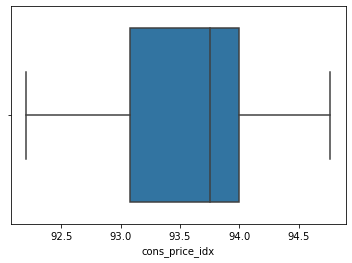

In [32]:
print("Outliers in cons_price_idx:",outliers(por.cons_price_idx))
print("Number of Outliers in cons_price_idx:",len(outliers(por.cons_price_idx)))
sns.boxplot(por.cons_price_idx)

Outliers in cons_conf_idx: [-26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9 -26.9
 -26.9 -26.9 -26.9 -26.9

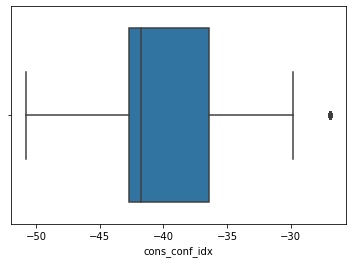

In [33]:
print("Outliers in cons_conf_idx:",outliers(por.cons_conf_idx))
print("Number of Outliers in cons_conf_idx:",len(outliers(por.cons_conf_idx)))
sns.boxplot(por.cons_conf_idx)

Outliers in euribor3m: []
Number of Outliers in euribor3m: 0


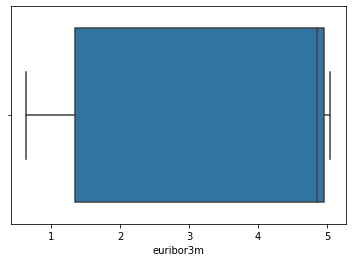

In [34]:

print("Outliers in euribor3m:",outliers(por.euribor3m))
print("Number of Outliers in euribor3m:",len(outliers(por.euribor3m)))
sns.boxplot(por.euribor3m)

### 4.3 Analyse the Categorical variables


In [35]:
#finding the no.of categorical features
cat_fea=[fea for fea in por.columns if por[fea].dtypes == 'O']
print(" No.of categorical_features:", len(cat_fea))


# displaying the first five records
por[cat_fea].head()

 No.of categorical_features: 11


,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,previous_outcome,Term_deposit
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [36]:
#changing into Categorical datatype using Pandas Categorical Function
for fea in cat_fea:
    por[fea]=pd.Categorical(por[fea])

### finding the unique values of each feature

In [37]:
for fea in cat_fea:
    print("Unique values in ", fea ,":") 
    print(por[fea].unique())
    print("No.of unique values in {} are : {}".format(fea,len(por[fea].unique())))
    print(" ")
    

Unique values in  job :
[housemaid, services, admin., blue-collar, technician, ..., unemployed, self-employed, unknown, entrepreneur, student]
Length: 12
Categories (12, object): [housemaid, services, admin., blue-collar, ..., self-employed, unknown, entrepreneur, student]
No.of unique values in job are : 12
 
Unique values in  marital :
[married, single, divorced, unknown]
Categories (4, object): [married, single, divorced, unknown]
No.of unique values in marital are : 4
 
Unique values in  education :
[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]
Categories (8, object): [basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]
No.of unique values in education are : 8
 
Unique values in  default_credit :
[no, unknown, yes]
Categories (3, object): [no, unknown, yes]
No.of unique values in default_credit are : 3
 
Unique values in  house_loan :
[no, yes, unknown]
Categories (3, obje

In [38]:
# checking whether the columns are converted from object to categorical type
por[cat_fea].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job                 41188 non-null  category
 1   marital             41188 non-null  category
 2   education           41188 non-null  category
 3   default_credit      41188 non-null  category
 4   house_loan          41188 non-null  category
 5   personal_loan       41188 non-null  category
 6   communication_type  41188 non-null  category
 7   month               41188 non-null  category
 8   day_of_week         41188 non-null  category
 9   previous_outcome    41188 non-null  category
 10  Term_deposit        41188 non-null  category
dtypes: category(11)
memory usage: 444.7 KB


#### Replacing the unknown values in categorical features with nan . 

In [39]:
for i in cat_fea:
    por[i].replace('unknown',np.nan,inplace=True)

### finding the unique value count in each categorical feature


In [40]:
por.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

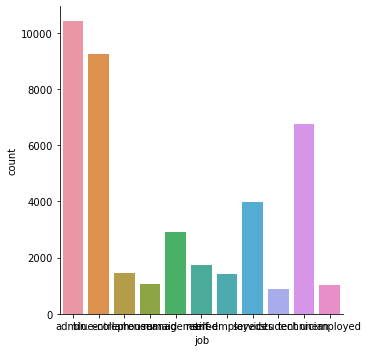

In [41]:
# visualization
sns.factorplot('job',data=por,kind='count')

In [42]:
por.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

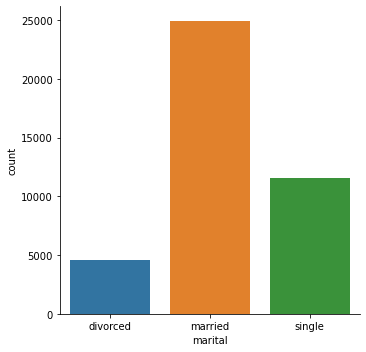

In [43]:
sns.factorplot('marital',data=por,kind='count')

In [44]:
por.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

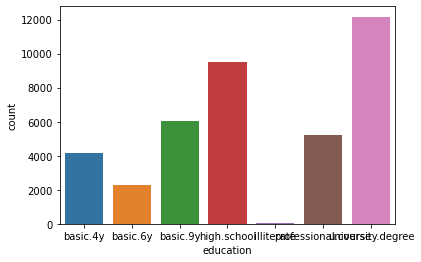

In [45]:
sns.countplot(x='education',data=por)

In [46]:
por.default_credit.value_counts()

no     32588
yes        3
Name: default_credit, dtype: int64

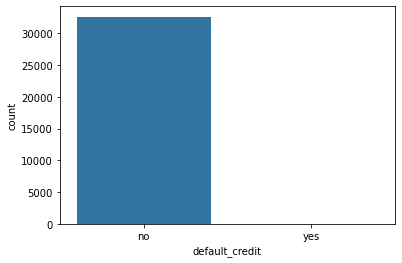

In [47]:
sns.countplot(x='default_credit',data=por)

In [48]:
por.house_loan.value_counts()

yes    21576
no     18622
Name: house_loan, dtype: int64

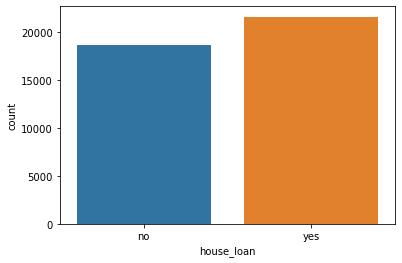

In [49]:
sns.countplot(x='house_loan',data=por)

In [50]:
por.personal_loan.value_counts()

no     33950
yes     6248
Name: personal_loan, dtype: int64

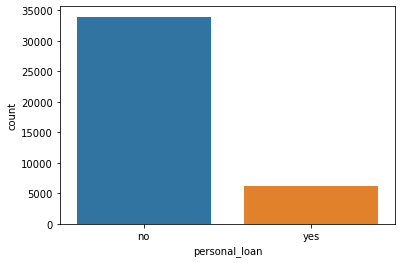

In [51]:
sns.countplot(x='personal_loan',data=por)

In [52]:
por.communication_type.value_counts()

cellular     26144
telephone    15044
Name: communication_type, dtype: int64

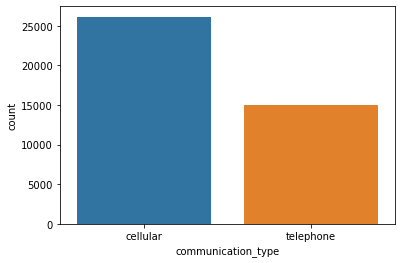

In [53]:
sns.countplot(x='communication_type',data=por)

In [54]:
por.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

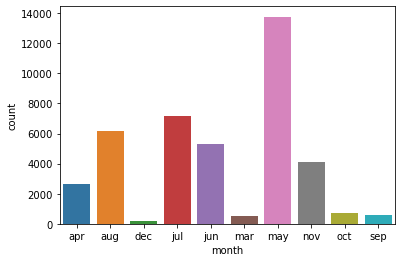

In [55]:
sns.countplot(x='month',data=por)

In [56]:
por.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

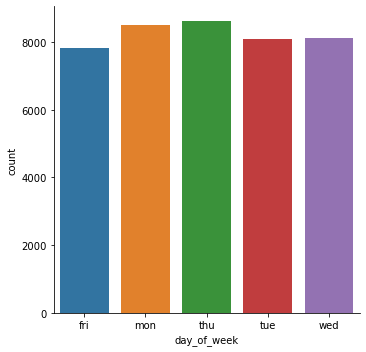

In [57]:
sns.factorplot('day_of_week',data=por,kind='count')

In [58]:
por.previous_outcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: previous_outcome, dtype: int64

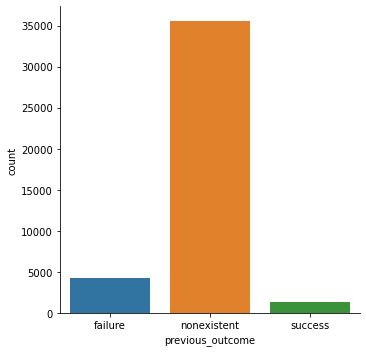

In [59]:
sns.factorplot('previous_outcome',data=por,kind='count')

## Bivariate analysis

#### Analysis between numerical & categorical features

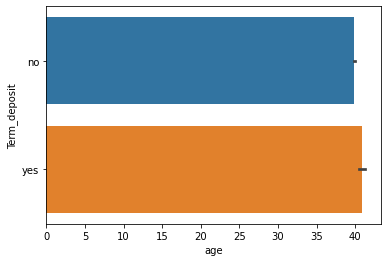

In [60]:
# Analysis between age && Term_deposit
sns.barplot(x=por.age,y=por.Term_deposit)

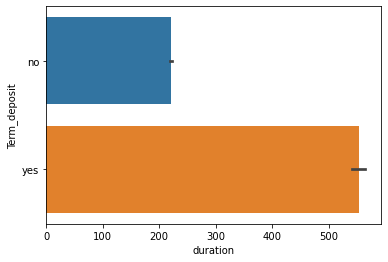

In [61]:
# Analysis between duration && Term_deposit
sns.barplot(x=por.duration,y=por.Term_deposit)

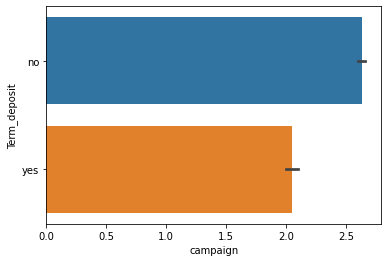

In [62]:
sns.barplot(x=por.campaign,y=por.Term_deposit)

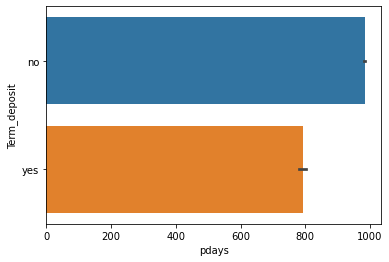

In [63]:
sns.barplot(x=por.pdays,y=por.Term_deposit)

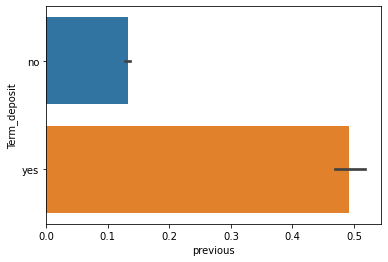

In [64]:
sns.barplot(x=por.previous,y=por.Term_deposit)

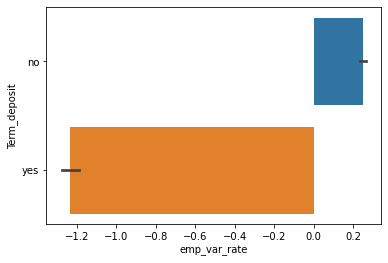

In [65]:
sns.barplot(x=por.emp_var_rate,y=por.Term_deposit)

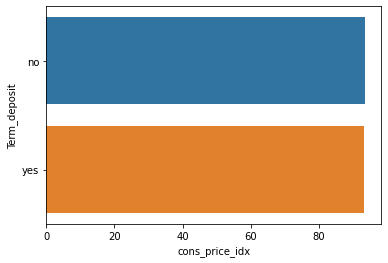

In [66]:
sns.barplot(x=por.cons_price_idx,y=por.Term_deposit)

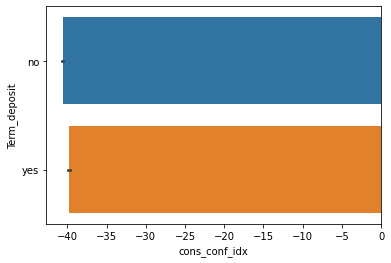

In [67]:
sns.barplot(x=por.cons_conf_idx,y=por.Term_deposit)

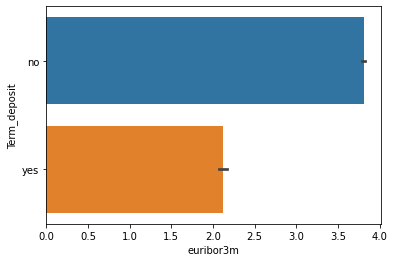

In [68]:
sns.barplot(x=por.euribor3m,y=por.Term_deposit)

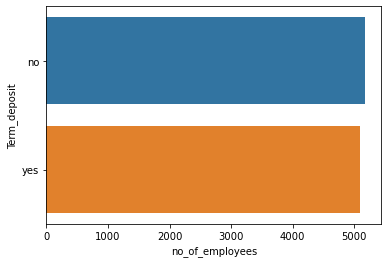

In [69]:
sns.barplot(x=por.no_of_employees,y=por.Term_deposit)

#### Analysis between categorical & categorical features

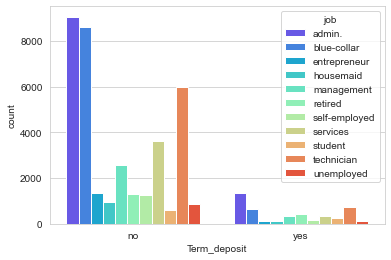

In [70]:
# Analysis between categorical & categorical features
sns.set_style("whitegrid")
sns.countplot(x='Term_deposit',hue='job',data=por,palette='rainbow')

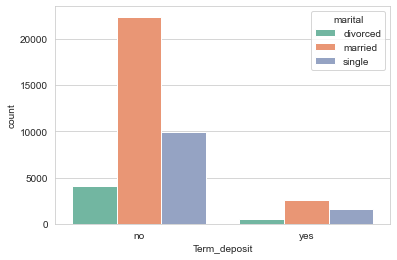

In [71]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue='marital',data=por,palette='Set2')

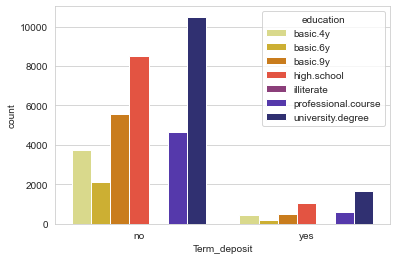

In [72]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="education",data=por,palette='CMRmap_r')

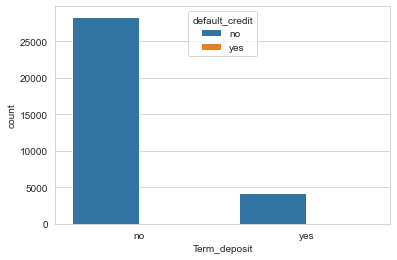

In [73]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="default_credit",data=por)

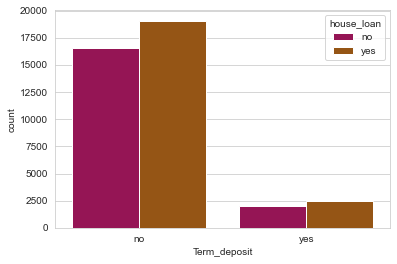

In [74]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="house_loan",data=por,palette="brg")

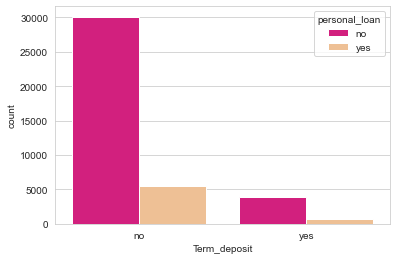

In [75]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="personal_loan",data=por,palette='Accent_r')

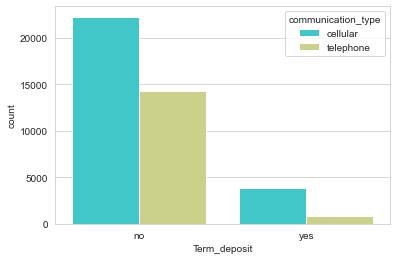

In [76]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="communication_type",data=por,palette='rainbow')

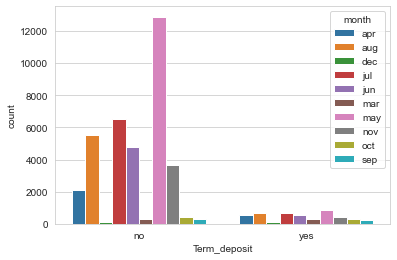

In [77]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue='month',data=por)

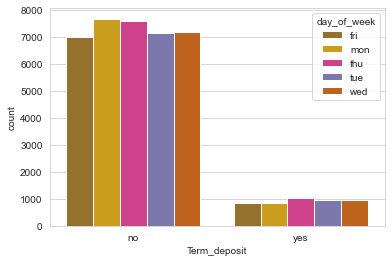

In [78]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="day_of_week",data=por,palette="Dark2_r")

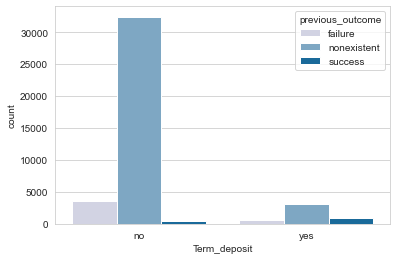

In [79]:
sns.set_style("whitegrid")
sns.countplot(x="Term_deposit",hue="previous_outcome",data=por,palette="PuBu")

# Step 5 : Feature Engineering

## 5.1 Handling Missing Values

#### from the above analysis some categorical features contains the unknown value which can be treated as null values as per the document.


### handling unknown values in categorical features and repalcing them with mode.

In [80]:
type(por)

pandas.core.frame.DataFrame

In [81]:
por.isnull().sum()

age                      0
job                    330
marital                 80
education             1731
default_credit        8597
house_loan             990
personal_loan          990
communication_type       0
month                    0
day_of_week              0
duration                 0
campaign                 0
pdays                    0
previous                 0
previous_outcome         0
emp_var_rate             0
cons_price_idx           0
cons_conf_idx            0
euribor3m                0
no_of_employees          0
Term_deposit             0
dtype: int64

In [82]:
for i in cat_fea:
    por[i].fillna(por[i].mode()[0],inplace=True)

In [83]:
por.isnull().sum()

age                   0
job                   0
marital               0
education             0
default_credit        0
house_loan            0
personal_loan         0
communication_type    0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
previous_outcome      0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
no_of_employees       0
Term_deposit          0
dtype: int64

## 5.2 Handling Outliers

In [84]:
# Using Capping method to handle outliers.
# defined the function for handling the outliers of all features 

# dont consider this for right now bcz this function not handling outliers ,,so follow the below cells for outliers handling
def outliers_handling(col):
    Q1=col.quantile(.25)
    Q3=col.quantile(.75)
    IQR=Q3-Q1
    Lower_bound=Q1-(1.5*IQR)
    Upper_bound=Q3+(1.5*IQR)
    
    col=np.where(
                    col>Upper_bound,
                    Upper_bound,
                    np.where(col<Lower_bound,Lower_bound,
                    col))
    




In [85]:
por1=por.copy()

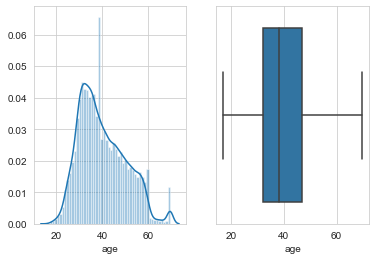

In [86]:
Q1=por1['age'].quantile(.25)
Q3=por1['age'].quantile(.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
por1['age']=np.where(
                    por1['age']>Upper_bound,
                    Upper_bound,
                    np.where(por1['age']<Lower_bound,Lower_bound,
                    por1['age']))


# visualization after handling the outliers
plt.subplot(1,2,1)
sns.distplot(por1.age)
plt.subplot(1,2,2)
sns.boxplot(por1.age)

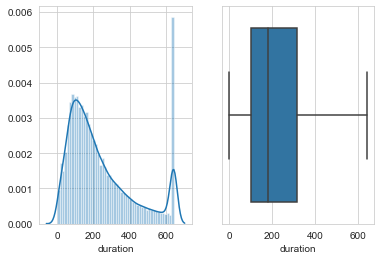

In [87]:
Q1=por1['duration'].quantile(.25)
Q3=por1['duration'].quantile(.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
por1['duration']=np.where(
                    por1['duration']>Upper_bound,
                    Upper_bound,
                    np.where(por1['duration']<Lower_bound,Lower_bound,
                    por1['duration']))

# visualization after handling the outliers
plt.subplot(1,2,1)
sns.distplot(por1.duration)
plt.subplot(1,2,2)
sns.boxplot(por1.duration)

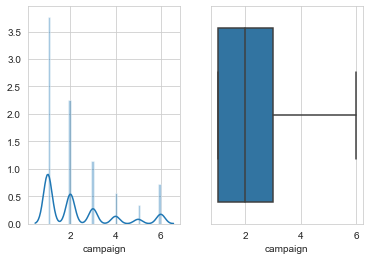

In [88]:
Q1=por1['campaign'].quantile(.25)
Q3=por1['campaign'].quantile(.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
por1['campaign']=np.where(
                    por1['campaign']>Upper_bound,
                    Upper_bound,
                    np.where(por1['campaign']<Lower_bound,Lower_bound,
                    por1['campaign']))

# visualization after handling the outliers
plt.subplot(1,2,1)
sns.distplot(por1.campaign)
plt.subplot(1,2,2)
sns.boxplot(por1.campaign)

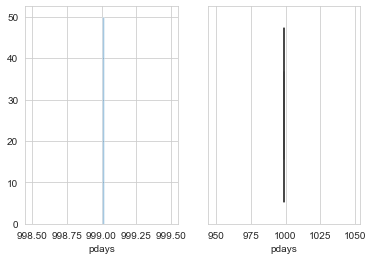

In [89]:
Q1=por1['pdays'].quantile(.25)
Q3=por1['pdays'].quantile(.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
por1['pdays']=np.where(
                    por1['pdays']>Upper_bound,
                    Upper_bound,
                    np.where(por1['pdays']<Lower_bound,Lower_bound,
                    por1['pdays']))

# visualization after handling the outliers
plt.subplot(1,2,1)
sns.distplot(por1.pdays)
plt.subplot(1,2,2)
sns.boxplot(por1.pdays)

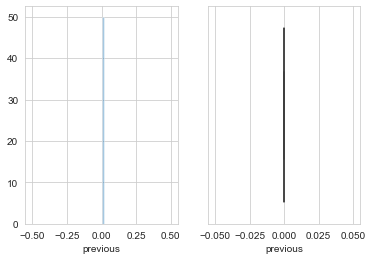

In [90]:
Q1=por1['previous'].quantile(.25)
Q3=por1['previous'].quantile(.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
por1['previous']=np.where(
                    por1['previous']>Upper_bound,
                    Upper_bound,
                    np.where(por1['previous']<Lower_bound,Lower_bound,
                    por1['previous']))

# visualization after handling the outliers
plt.subplot(1,2,1)
sns.distplot(por1.previous)
plt.subplot(1,2,2)
sns.boxplot(por1.previous)

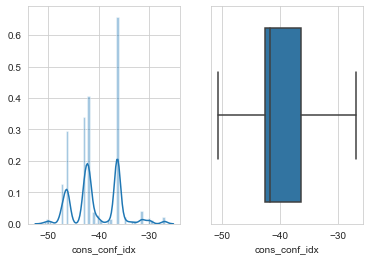

In [91]:
Q1=por1['cons_conf_idx'].quantile(.25)
Q3=por1['cons_conf_idx'].quantile(.75)
IQR=Q3-Q1
Lower_bound=Q1-(1.5*IQR)
Upper_bound=Q3+(1.5*IQR)
por1['cons_conf_idx']=np.where(
                    por1['cons_conf_idx']>Upper_bound,
                    Upper_bound,
                    np.where(por1['cons_conf_idx']<Lower_bound,Lower_bound,
                    por1['cons_conf_idx']))

# visualization after handling the outliers
plt.subplot(1,2,1)
sns.distplot(por1.cons_conf_idx)
plt.subplot(1,2,2)
sns.boxplot(por1.cons_conf_idx)

### Encoding : Converting Categorical features into Numerical features


In [92]:
por["Term_deposit"].value_counts()

no     36548
yes     4640
Name: Term_deposit, dtype: int64

In [93]:
por.head()

,age,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees,Term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [94]:
categ=cat_fea[:-1]
categ

['job',
 'marital',
 'education',
 'default_credit',
 'house_loan',
 'personal_loan',
 'communication_type',
 'month',
 'day_of_week',
 'previous_outcome']

In [95]:
from sklearn.preprocessing import LabelEncoder

for fea in categ:
    enc=LabelEncoder()
    por1[fea]=enc.fit_transform(por1[fea])


In [96]:
# checking whether categorical features are converted into numerical features

por1.head()

,age,job,marital,education,default_credit,house_loan,personal_loan,communication_type,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,no_of_employees,Term_deposit
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,7,1,3,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,7,1,3,0,1,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,7,1,3,0,0,1,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,no


### Feature Selection

In [97]:
# using the SelectKBest method 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X=por1.iloc[:,0:20]
y=por1.iloc[:,20]

bestfeatures=SelectKBest(score_func=f_classif,k=10)
features=bestfeatures.fit(X,y)

dfscores=pd.DataFrame(features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank
#print(features_rank.nlargest(10,'Score'))  
print(features_rank.nlargest(12,'Score'))  


                     0        Score
10            duration  7905.190380
19     no_of_employees  5926.610601
18           euribor3m  4309.479048
15        emp_var_rate  4023.829925
7   communication_type   881.707070
16      cons_price_idx   778.589795
14    previous_outcome   705.678164
11            campaign   199.329478
3            education   135.519152
17       cons_conf_idx   124.006901
2              marital    86.761125
1                  job    26.760229


###  Defining the input and output

In [98]:
X_new=por1[['duration','no_of_employees','euribor3m','emp_var_rate','communication_type','cons_price_idx','previous_outcome','campaign','education','cons_conf_idx']]
y_new=por1[['Term_deposit']]

In [99]:
X_new.head()

,duration,no_of_employees,euribor3m,emp_var_rate,communication_type,cons_price_idx,previous_outcome,campaign,education,cons_conf_idx
0,261.0,5191.0,4.857,1.1,1,93.994,1,1.0,0,-36.4
1,149.0,5191.0,4.857,1.1,1,93.994,1,1.0,3,-36.4
2,226.0,5191.0,4.857,1.1,1,93.994,1,1.0,3,-36.4
3,151.0,5191.0,4.857,1.1,1,93.994,1,1.0,1,-36.4
4,307.0,5191.0,4.857,1.1,1,93.994,1,1.0,3,-36.4


In [100]:
y_new.head()

,Term_deposit
0,no
1,no
2,no
3,no
4,no


### Splitting the data into train and test data

In [101]:
from sklearn.model_selection import train_test_split

X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X_new,y_new,random_state=10)

In [102]:
X_new_train.head()

,duration,no_of_employees,euribor3m,emp_var_rate,communication_type,cons_price_idx,previous_outcome,campaign,education,cons_conf_idx
24975,95.0,5195.8,4.153,-0.1,0,93.200,1,1.0,6,-42.0
31209,258.0,5099.1,1.334,-1.8,0,92.893,1,6.0,5,-46.2
28422,339.0,5099.1,1.435,-1.8,0,93.075,1,1.0,3,-47.1
4699,85.0,5191.0,4.858,1.1,1,93.994,1,1.0,0,-36.4
2936,123.0,5191.0,4.859,1.1,1,93.994,1,1.0,0,-36.4


In [103]:
y_new_train.head()


,Term_deposit
24975,no
31209,no
28422,no
4699,no
2936,no


### Feature Scaling

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
norm=scaler.fit(X_new_train)
X_train_norm=norm.transform(X_new_train)

X_test_norm=norm.transform(X_new_test)

### Handling class imbalance problem
  

In [105]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train_norm,y_new_train)


print("Before SMOTE:",Counter(y_new_train))
print("After SMOTE:",Counter(y_smote))


Before SMOTE: Counter({'Term_deposit': 1})
After SMOTE: Counter({'Term_deposit': 1})


# Predicting whether the person will subscribe to Term deposit or not

## Model 1: Logistic regression

In [106]:
from sklearn.linear_model import LogisticRegression

#define the model
lr=LogisticRegression()

# train the model
lr.fit(X_smote,y_smote)

#predict the output 
y_predict=lr.predict(X_test_norm)

#checking the y_predict
y_predict

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

## Evaluating the model using metrics



In [107]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def metrics(m,y_new_test,y_predict):
    print("Accuracy score for {} is : {}".format(m,accuracy_score(y_new_test,y_predict)))
    print(" ")
    print("Confusion matrix for {} is : ".format(m))
    print(" ")
    print(confusion_matrix(y_new_test,y_predict))
    print(" ")
    print("Classification report for {} is : ".format(m))
    print(" ")
    print(classification_report(y_new_test,y_predict))
    


In [108]:
metrics("Logistic Regression",y_new_test,y_predict)

Accuracy score for Logistic Regression is : 0.8478197533262115
 
Confusion matrix for Logistic Regression is : 
 
[[7675 1428]
 [ 139 1055]]
 
Classification report for Logistic Regression is : 
 
              precision    recall  f1-score   support

          no       0.98      0.84      0.91      9103
         yes       0.42      0.88      0.57      1194

    accuracy                           0.85     10297
   macro avg       0.70      0.86      0.74     10297
weighted avg       0.92      0.85      0.87     10297



## Model 2:  KNN algorithm




In [109]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier() # default k=5
knn.fit(X_smote,y_smote)
y_predict_knn=knn.predict(X_test_norm)

print("mertics for k=5 :")
print(" ")
metrics("KNearestNeighbors",y_new_test,y_predict_knn)

print("metrics for k=7 :")
print(" ")
knn=KNeighborsClassifier(n_neighbors=7,metric='euclidean') # default k=5
knn.fit(X_smote,y_smote)
y_predict_knn7=knn.predict(X_test_norm)
metrics("KNearestNeighbors",y_new_test,y_predict_knn7)

print("metrics for k=9 :")
print(" ")
knn=KNeighborsClassifier(n_neighbors=9,metric='euclidean') # default k=5
knn.fit(X_smote,y_smote)
y_predict_knn9=knn.predict(X_test_norm)
metrics("KNearestNeighbors",y_new_test,y_predict_knn9)

mertics for k=5 :
 
Accuracy score for KNearestNeighbors is : 0.8625813343692338
 
Confusion matrix for KNearestNeighbors is : 
 
[[7976 1127]
 [ 288  906]]
 
Classification report for KNearestNeighbors is : 
 
              precision    recall  f1-score   support

          no       0.97      0.88      0.92      9103
         yes       0.45      0.76      0.56      1194

    accuracy                           0.86     10297
   macro avg       0.71      0.82      0.74     10297
weighted avg       0.90      0.86      0.88     10297

metrics for k=7 :
 
Accuracy score for KNearestNeighbors is : 0.8604447897445858
 
Confusion matrix for KNearestNeighbors is : 
 
[[7900 1203]
 [ 234  960]]
 
Classification report for KNearestNeighbors is : 
 
              precision    recall  f1-score   support

          no       0.97      0.87      0.92      9103
         yes       0.44      0.80      0.57      1194

    accuracy                           0.86     10297
   macro avg       0.71      0.84

## Model 3: Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Training the model
dtree=DecisionTreeClassifier()
dtree.fit(X_smote,y_smote)

#predicting the model
y_predict_tree=dtree.predict(X_test_norm)




#finding the metrics for evaluating the model
print("Metrics for Decision tree Algorithm are: ")
metrics("Decision Tree",y_new_test,y_predict_tree)

Metrics for Decision tree Algorithm are: 
Accuracy score for Decision Tree is : 0.8804506166844712
 
Confusion matrix for Decision Tree is : 
 
[[8380  723]
 [ 508  686]]
 
Classification report for Decision Tree is : 
 
              precision    recall  f1-score   support

          no       0.94      0.92      0.93      9103
         yes       0.49      0.57      0.53      1194

    accuracy                           0.88     10297
   macro avg       0.71      0.75      0.73     10297
weighted avg       0.89      0.88      0.88     10297



## Model 4 : Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Training the model
rand_forest=RandomForestClassifier()
rand_forest.fit(X_smote,y_smote)

#predicting the model
y_predict_rand=rand_forest.predict(X_test_norm)

#Evaluating the model
print("Metrics for Random Forest Classifier Algorithm are: ")
metrics("Random Forest ",y_new_test,y_predict_rand)

Metrics for Random Forest Classifier Algorithm are: 
Accuracy score for Random Forest  is : 0.8916189181314946
 
Confusion matrix for Random Forest  is : 
 
[[8434  669]
 [ 447  747]]
 
Classification report for Random Forest  is : 
 
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      9103
         yes       0.53      0.63      0.57      1194

    accuracy                           0.89     10297
   macro avg       0.74      0.78      0.76     10297
weighted avg       0.90      0.89      0.90     10297



## Model 5: XGboost Classifier

In [112]:
from xgboost import XGBClassifier

# Training the model
xgb=XGBClassifier()
xgb.fit(X_smote,y_smote)

#predicting the model
y_predict_xgb=xgb.predict(X_test_norm)

#evaluating the model
print("XGBoost Classifier Metrics :")
metrics("XGBoost",y_new_test,y_predict_xgb)

[11:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classifier Metrics :
Accuracy score for XGBoost is : 0.8961833543750607
 
Confusion matrix for XGBoost is : 
 
[[8359  744]
 [ 325  869]]
 
Classification report for XGBoost is : 
 
              precision    recall  f1-score   support

          no       0.96      0.92      0.94      9103
         yes       0.54      0.73      0.62      1194

    accuracy                           0.90     10297
   macro avg       0.75      0.82      0.78     10297
weighted avg       0.91      0.90      0.90     10297



## HyperParameter Tuning

In [113]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV



### For knn :

In [114]:
parameters={'n_neighbors':[5,7,9,11,13,15],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidean','manhattan']}
knn_grid=GridSearchCV(estimator=knn,param_grid=parameters, scoring='accuracy',cv=10)
knn_grid.fit(X_smote,y_smote)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=9),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [115]:
print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.9272180725086537
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [116]:
random_grid=RandomizedSearchCV(estimator=knn,param_distributions=parameters,cv=10,scoring='accuracy')
random_grid.fit(X_smote,y_smote)

RandomizedSearchCV(cv=10,
                   estimator=KNeighborsClassifier(metric='euclidean',
                                                  n_neighbors=9),
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [117]:
print(random_grid.best_score_)
print(random_grid.best_params_)

0.924448897795591
{'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean'}


Out of GridSearchCV & RandomisedSearchCv the GridSearchCv gives the better accuarcy for KNN algorithm.

### For Decision Tree:

In [118]:
parameters={'max_depth':np.arange(1,11),
            'criterion':['gini','entropy'],
            'min_samples_split':[2,3,4,5]}

In [119]:
dtree_grid=GridSearchCV(estimator=dtree,param_grid=parameters, scoring='accuracy',cv=10)
dtree_grid.fit(X_smote,y_smote)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [120]:
print(dtree_grid.best_score_)
print(dtree_grid.best_params_)

0.9118418655492805
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [121]:
dtree_random=RandomizedSearchCV(estimator=dtree,param_distributions=parameters,cv=10,scoring='accuracy')
dtree_random.fit(X_smote,y_smote)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring='accuracy')

In [122]:
print(dtree_random.best_score_)
print(dtree_random.best_params_)

0.9116961195117508
{'min_samples_split': 3, 'max_depth': 10, 'criterion': 'gini'}


### For Random Forest:

In [123]:
'''
parameters={
            'max_depth':[5,8,15,25,30],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy'],
            'min_samples_leaf':[1,2,3]
            }
'''

"\nparameters={\n            'max_depth':[5,8,15,25,30],\n            'min_samples_split':[2,3,4,5],\n            'criterion':['gini','entropy'],\n            'min_samples_leaf':[1,2,3]\n            }\n"

In [124]:
'''
randonforest_grid=GridSearchCV(estimator=rand_forest,param_grid=parameters, scoring='accuracy',cv=10)
randonforest_grid.fit(X_smote,y_smote)
''' 

"\nrandonforest_grid=GridSearchCV(estimator=rand_forest,param_grid=parameters, scoring='accuracy',cv=10)\nrandonforest_grid.fit(X_smote,y_smote)\n"

In [125]:
'''
print(randonforest_grid.best_score_)
print(randonforest_grid.best_params_)
'''

'\nprint(randonforest_grid.best_score_)\nprint(randonforest_grid.best_params_)\n'

In [126]:
'''
randonforest_random=RandomizedSearchCV(estimator=rand_forest,param_distributions=parameters,cv=10,scoring='accuracy')
randonforest_random.fit(X_smote,y_smote)
'''

"\nrandonforest_random=RandomizedSearchCV(estimator=rand_forest,param_distributions=parameters,cv=10,scoring='accuracy')\nrandonforest_random.fit(X_smote,y_smote)\n"

In [127]:
'''
print(randonforest_random.best_score_)
print(randonforest_random.best_params_)

'''

'\nprint(randonforest_random.best_score_)\nprint(randonforest_random.best_params_)\n\n'

### For Xgboost

In [128]:
'''
parameters={}
'''

In [129]:
'''
xgboost_grid=GridSearchCV(estimator=xgb,param_grid=parameters, scoring='accuracy',cv=10)
xgboost_grid.fit(X_smote,y_smote)
'''

[11:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [130]:
'''
print(xgboost_grid.best_score_)
print(xgboost_grid.best_params_)
'''

0.937875751503006
{}


In [131]:
'''
xgboost_random=RandomizedSearchCV(estimator=xgb,param_distributions=parameters,cv=10,scoring='accuracy')
xgboost_random.fit(X_smote,y_smote)
'''

[11:34:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                      

In [132]:
'''
print(xgboost_random.best_score_)
print(xgboost_random.best_params_)

'''

0.937875751503006
{}


## Exporting the model

In [133]:
import joblib 
joblib.dump(xgboost_random,'Portugese_trained_model.pkl') # .pkl pickle

['Portugese_trained_model.pkl']